In [19]:
!rm ../data/dataset.csv
!cat ../data/en/hasoc2019/hasoc2019.csv >> ../data/dataset.csv
!cat ../data/en/hate_speech_icwsm18/nhsm.csv >> ../data/dataset.csv
!cat ../data/en/hate-speech-and-offensive-language/t_davidson.csv >> ../data/dataset.csv
!cat ../data/en/ousidhoum-etal-multilingual-hate-speech-2019/ousidhoum.csv >> ../data/dataset.csv
!cat ../data/en/semeval2019/semeval2019.csv >> ../data/dataset.csv

In [127]:
# !pip install matplotlib
# !pip install ekphrasis
# !pip install seaborn

In [86]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import feature_generation as fg

In [87]:
df_en = pd.read_csv('../data/dataset.csv')
print(df_en.shape)
df_en.drop(df_en[(df_en['text_id'] == 'text_id')].index,inplace=True)
df_en.drop(df_en[(df_en['hate'] == 'HS')].index,inplace=True)
df_en.rename(columns={'hate':'class'},inplace=True)
print(df_en.describe())

(50386, 3)
             text_id          text  class
count          50381         50381  50381
unique         49524         50000      3
top     hasoc_en_512  @user retard      2
freq               2             5  22898


Size of dataset: 50381
Hateful (class) = 1: 10738 ( 21.313590440840795 %)
Offensive (class) = 2: 22898 ( 45.44967348802128 %)

****

**Hateful examples (class) = 1
["A gangster sets out to fulfill his father’s dream of becoming a doctor.    Doctor's in #WestBengal be like #munna_bhai_MBBS    #DoctorsFightBack #DoctorsStrike #DoctorsUnderOppression   @MamataOfficial https://t.co/lZQcStQ2Md", 'That’s not white supremacy though is it. That means whites thinking AND ACTING as though they are superior to others. What these Jew/Muslim joint actions are concerned with is protecting stuff like Halal/Kosher, circumcision and the right to wear religious garb. 1/2', 'Sit his ass down!  Tape his fingers and duct-tape his mouth.  Then throw him in a cage with the immigrants.  Problem solved!  Such a vision.  America, Free of Trump.  Darn, I just woke up.  Dems will do nothing.  #FuckTrump #FuckGOP #FuckCivility #ImpeachmentInquiryNow https://t.co/gU8oBArfo8', 'Congress abusive language towards PM M

<AxesSubplot:xlabel='class'>

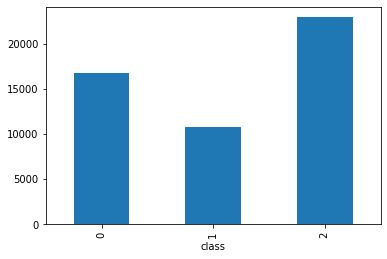

In [88]:
total = df_en.shape[0]
gp = df_en.groupby(['class'])['text_id'].count()
hate = gp[1]
offensive = gp[2]
print("Size of dataset:", total)
print("Hateful (class) = 1:", hate, "(",hate/total*100,"%)")
print("Offensive (class) = 2:",offensive, "(",offensive/total*100,"%)")
print("\n****\n")
print('**Hateful examples (class) = 1')
print(list(df_en[df_en['class']=="1"]['text'][0:10]))

print('\n**Offensive examples (class) = 2')
print(list(df_en[df_en['class']=="2"]['text'][0:10]))
gp.plot(kind='bar')


### Pre process text

In [89]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


In [90]:
pre = fg.features()
df_en['ekphrasis_clean_text'] = df_en.apply(lambda x: " ".join(text_processor.pre_process_doc(x.text)),axis=1)
df_en['basic_clean_text'] = df_en.apply(lambda x: pre.preprocess(x.text), axis = 1)

In [91]:
print(df_en['text'][100])
print(df_en['ekphrasis_clean_text'][100])

Why the #DoctorsFightBack is not just about violence unleashed on them ? Its time to address faltering justice systems, crippled health systems and broken dreams  https://t.co/S2akvvDDlY
why the <hashtag> doctors fight back </hashtag> is not just about violence unleashed on them ? its time to address faltering justice systems , crippled health systems and broken dreams <url>


In [93]:
print(df_en['text'][100])
print(df_en['basic_clean_text'][100])

Why the #DoctorsFightBack is not just about violence unleashed on them ? Its time to address faltering justice systems, crippled health systems and broken dreams  https://t.co/S2akvvDDlY
Why the #DoctorsFightBack is not just about violence unleashed on them ? Its time to address faltering justice systems, crippled health systems and broken dreams 


In [96]:
text = df_en.text
feat = fg.features()
M,fnames = feat.get_feature_array(text)

/homes/nv304/py3tf2/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/homes/nv304/py3tf2/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/homes/nv304/py3tf2/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [99]:
X = pd.DataFrame(M)
y = df_en['class'].astype(int)

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(class_weight='balanced',
                                                  penalty="l2", C=0.01, max_iter=10000 ))),
        ('model', LogisticRegression(class_weight='balanced',penalty='l2', max_iter=10000 ))])

param_grid = [{}] # Optionally add parameters here

In [115]:
grid_search = GridSearchCV(pipe, 
                           param_grid,
                           cv=StratifiedKFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2,
                           n_jobs=-1
                          )

/homes/nv304/py3tf2/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


In [117]:
model


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fc8bfd29258>,
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('select',
                                        SelectFromModel(estimator=LogisticRegression(C=0.01,
                                                                                     class_weight='balanced',
                                                                                     dual=False,
                                                                                     fit_intercept=True,
                                                                                     intercept_scaling=1,
                                                                                     l1_ratio=None,
                                                                                     max_iter=10000,
                                                                                     multi_c

In [118]:
y_preds = model.predict(X_test)

In [119]:
report = classification_report( y_test, y_preds )

In [122]:
print(report)

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      3346
           1       0.50      0.55      0.53      2179
           2       0.84      0.83      0.84      4552

    accuracy                           0.73     10077
   macro avg       0.70      0.70      0.70     10077
weighted avg       0.74      0.73      0.73     10077



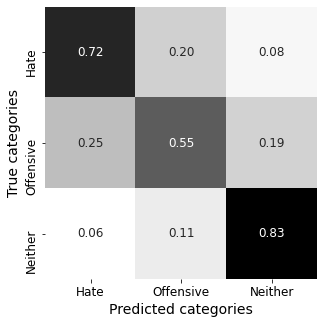

In [128]:
import numpy as np
import seaborn
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)
